In [1]:
import numpy as np
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Dataset.txt')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')

In [5]:
attack_type = pd.read_csv('Attack_types.txt')

In [6]:
attack_type.shape

(41, 1)

In [7]:
df.shape

(125973, 43)

In [1]:
df.isnull()

NameError: name 'df' is not defined

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [11]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')

In [12]:
df.columns = ['Duration', 'Protocol Type', 'Service', 'Flag', 'Source Bytes','Destination Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot',
       'Num Failed Logins', 'LoggedIn', 'Num Compromised', 'Root Shell',
       'Su Attempted', 'Num Root', 'Num File Creations', 'Num Shells',
       'Num Access Files', 'Num Outbound cmds', 'Is Host Login',
       'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate',
       'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate', 'Same Srv Rate',
       'Diff Srv Rate', 'Srv Diff Host Rate', 'Dst Host Count',
       'Dst Host Srv Count', 'Dst Host Same Srv Rate',
       'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate',
       'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate',
       'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate',
       'Dst Host Srv Rerror Rate', 'Attack Category', 'Occurance']

In [13]:
len(df.columns)

43

In [14]:
df.columns

Index(['Duration', 'Protocol Type', 'Service', 'Flag', 'Source Bytes',
       'Destination Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot',
       'Num Failed Logins', 'LoggedIn', 'Num Compromised', 'Root Shell',
       'Su Attempted', 'Num Root', 'Num File Creations', 'Num Shells',
       'Num Access Files', 'Num Outbound cmds', 'Is Host Login',
       'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate',
       'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate', 'Same Srv Rate',
       'Diff Srv Rate', 'Srv Diff Host Rate', 'Dst Host Count',
       'Dst Host Srv Count', 'Dst Host Same Srv Rate',
       'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate',
       'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate',
       'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate',
       'Dst Host Srv Rerror Rate', 'Attack Category', 'Occurance'],
      dtype='object')

In [15]:
df

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Attack Category,Occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [16]:
attack_type.head()

,attack_category attack_type
0,apache2 dos
1,back dos
2,mailbomb dos
3,processtable dos
4,snmpgetattack dos


In [17]:
attack_type.shape

(41, 1)

In [1]:
attack_type.columns = ['Attack Category Attack Type']

NameError: name 'attack_type' is not defined

In [2]:
attack_type.head()

NameError: name 'attack_type' is not defined

In [20]:
df.describe()

,Duration,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,Num Failed Logins,LoggedIn,Num Compromised,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


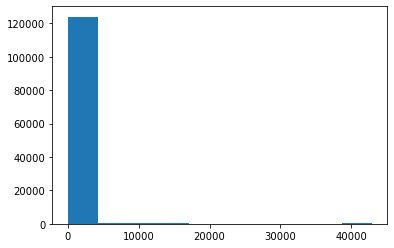

In [21]:
plt.hist(df['Duration'], bins=10)
plt.show()

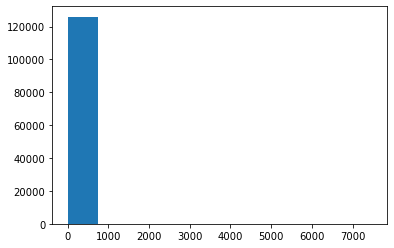

In [22]:
plt.hist(df['Num Compromised'], bins=10)
plt.show()

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Attack Category,Occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [25]:
df.dropna()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Attack Category,Occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [26]:
df.shape

(125973, 43)

In [27]:
df['Service'].describe()

count     125973
unique        70
top         http
freq       40338
Name: Service, dtype: object

In [28]:
df['Service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
harvest          2
http_8001        2
aol              2
http_2784        1
Name: Service, Length: 70, dtype: int64

In [29]:
df['Destination Bytes'].describe()

count    1.259730e+05
mean     1.977911e+04
std      4.021269e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.160000e+02
max      1.309937e+09
Name: Destination Bytes, dtype: float64

In [30]:
df['Destination Bytes'].value_counts()

0        67967
105       1497
8314       888
330        528
331        512
         ...  
7125         1
9170         1
6447         1
20941        1
14542        1
Name: Destination Bytes, Length: 9326, dtype: int64

In [31]:
df['Source Bytes'].describe()

count    1.259730e+05
mean     4.556674e+04
std      5.870331e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.760000e+02
max      1.379964e+09
Name: Source Bytes, dtype: float64

In [32]:
df['Source Bytes'].value_counts()

0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
11610        1
11546        1
3294         1
11482        1
4094         1
Name: Source Bytes, Length: 3341, dtype: int64

In [33]:
df['Protocol Type'].describe()

count     125973
unique         3
top          tcp
freq      102689
Name: Protocol Type, dtype: object

In [34]:
df['Protocol Type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: Protocol Type, dtype: int64

In [35]:
df.corr()

,Duration,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,Num Failed Logins,LoggedIn,Num Compromised,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Occurance
Duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.156311
Source Bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592
Destination Bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076
Land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038
Wrong Fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.157130
Urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411
Hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.160013
Num Failed Logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178
LoggedIn,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806,0.269818
Num Compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101


In [36]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# identify outliers
outliers = df[(df < q1 - 1.5*iqr) | (df > q3 + 1.5*iqr)]

# print the outliers
print(outliers)

<ipython-input-36-b880ccfb93ce>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < q1 - 1.5*iqr) | (df > q3 + 1.5*iqr)]
<ipython-input-36-b880ccfb93ce>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < q1 - 1.5*iqr) | (df > q3 + 1.5*iqr)]


        Duration Protocol Type Service Flag  Source Bytes  Destination Bytes  \
0            NaN           NaN     NaN  NaN           NaN                NaN   
1            NaN           NaN     NaN  NaN           NaN                NaN   
2            NaN           NaN     NaN  NaN           NaN                NaN   
3            NaN           NaN     NaN  NaN           NaN             8153.0   
4            NaN           NaN     NaN  NaN           NaN                NaN   
...          ...           ...     ...  ...           ...                ...   
125968       NaN           NaN     NaN  NaN           NaN                NaN   
125969       8.0           NaN     NaN  NaN           NaN                NaN   
125970       NaN           NaN     NaN  NaN        2231.0                NaN   
125971       NaN           NaN     NaN  NaN           NaN                NaN   
125972       NaN           NaN     NaN  NaN           NaN                NaN   

        Land  Wrong Fragment  Urgent  H

In [37]:
df

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Attack Category,Occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


C:\Users\Talha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Source Bytes', ylabel='Density'>

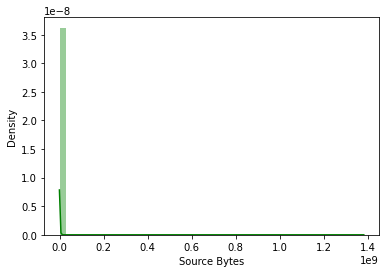

In [38]:
sns.distplot(df['Source Bytes'], color = "g")

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Destination Bytes'>

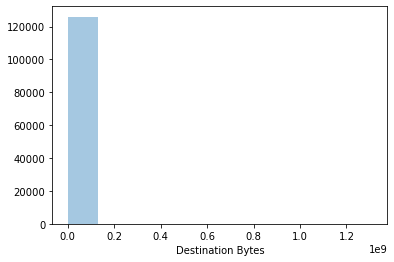

In [39]:
sns.distplot(df["Destination Bytes"],bins=10,kde=False)

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source Bytes', ylabel='Destination Bytes'>

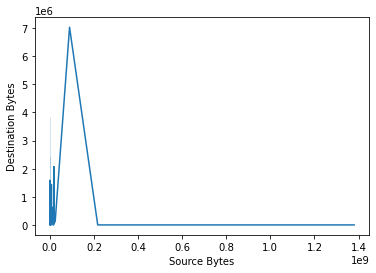

In [40]:
sns.lineplot( df['Source Bytes'], df['Destination Bytes'])

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source Bytes', ylabel='Destination Bytes'>

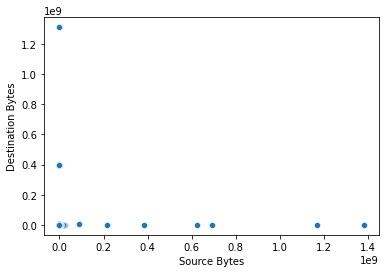

In [41]:
sns.scatterplot(df['Source Bytes'], df['Destination Bytes'])

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source Bytes', ylabel='Destination Bytes'>

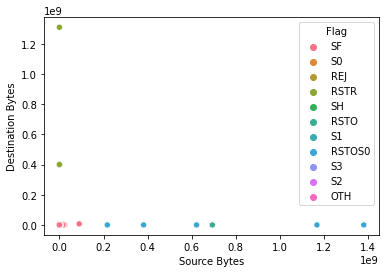

In [42]:
sns.scatterplot( df['Source Bytes'], df['Destination Bytes'], hue =df["Flag"])

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination Bytes'>

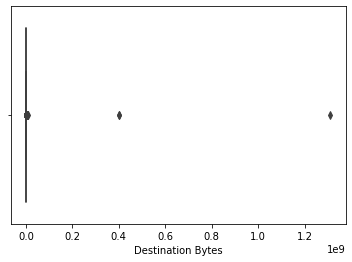

In [43]:
sns.boxplot( df['Destination Bytes'] )

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source Bytes', ylabel='Destination Bytes'>

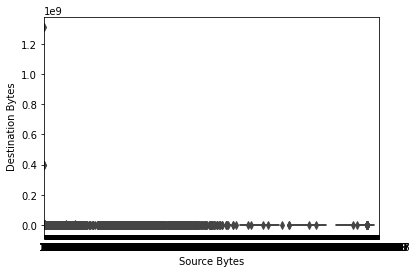

In [44]:
sns.boxplot(  df['Source Bytes'], df['Destination Bytes'])

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source Bytes', ylabel='Destination Bytes'>

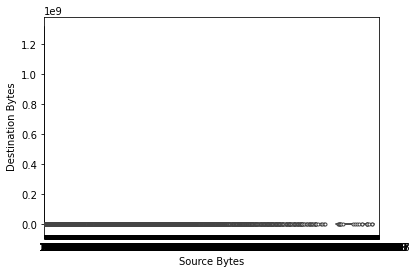

In [45]:
sns.violinplot(df['Source Bytes'], df['Destination Bytes'])

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flag', ylabel='count'>

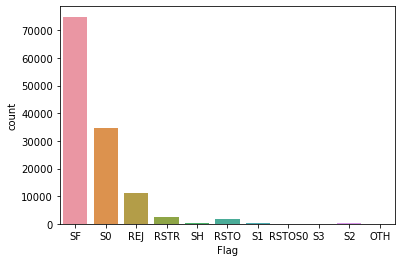

In [46]:
sns.countplot(df["Flag"])

In [47]:
attack_type

,Attack Category Attack Type
0,apache2 dos
1,back dos
2,mailbomb dos
3,processtable dos
4,snmpgetattack dos
5,teardrop dos
6,smurf dos
7,land dos
8,neptune dos
9,pod dos


In [48]:
df.columns

Index(['Duration', 'Protocol Type', 'Service', 'Flag', 'Source Bytes',
       'Destination Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot',
       'Num Failed Logins', 'LoggedIn', 'Num Compromised', 'Root Shell',
       'Su Attempted', 'Num Root', 'Num File Creations', 'Num Shells',
       'Num Access Files', 'Num Outbound cmds', 'Is Host Login',
       'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate',
       'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate', 'Same Srv Rate',
       'Diff Srv Rate', 'Srv Diff Host Rate', 'Dst Host Count',
       'Dst Host Srv Count', 'Dst Host Same Srv Rate',
       'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate',
       'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate',
       'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate',
       'Dst Host Srv Rerror Rate', 'Attack Category', 'Occurance'],
      dtype='object')

In [49]:
newdata= df[['Destination Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot',
       'Num Failed Logins', 'LoggedIn', 'Num Compromised', 'Root Shell',
       'Su Attempted', 'Num Root', 'Num File Creations', 'Num Shells',
       'Num Access Files', 'Num Outbound cmds', 'Is Host Login',
       'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate',
       'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate', 'Same Srv Rate',
       'Diff Srv Rate', 'Srv Diff Host Rate', 'Dst Host Count',
       'Dst Host Srv Count', 'Dst Host Same Srv Rate',
       'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate',
       'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate',
       'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate',
       'Dst Host Srv Rerror Rate',  'Occurance']]

In [50]:
df['Attack Category'].describe()

count     125973
unique        23
top       normal
freq       67343
Name: Attack Category, dtype: object

In [51]:
df['Attack Category'] == '<'

0         False
1         False
2         False
3         False
4         False
          ...  
125968    False
125969    False
125970    False
125971    False
125972    False
Name: Attack Category, Length: 125973, dtype: bool

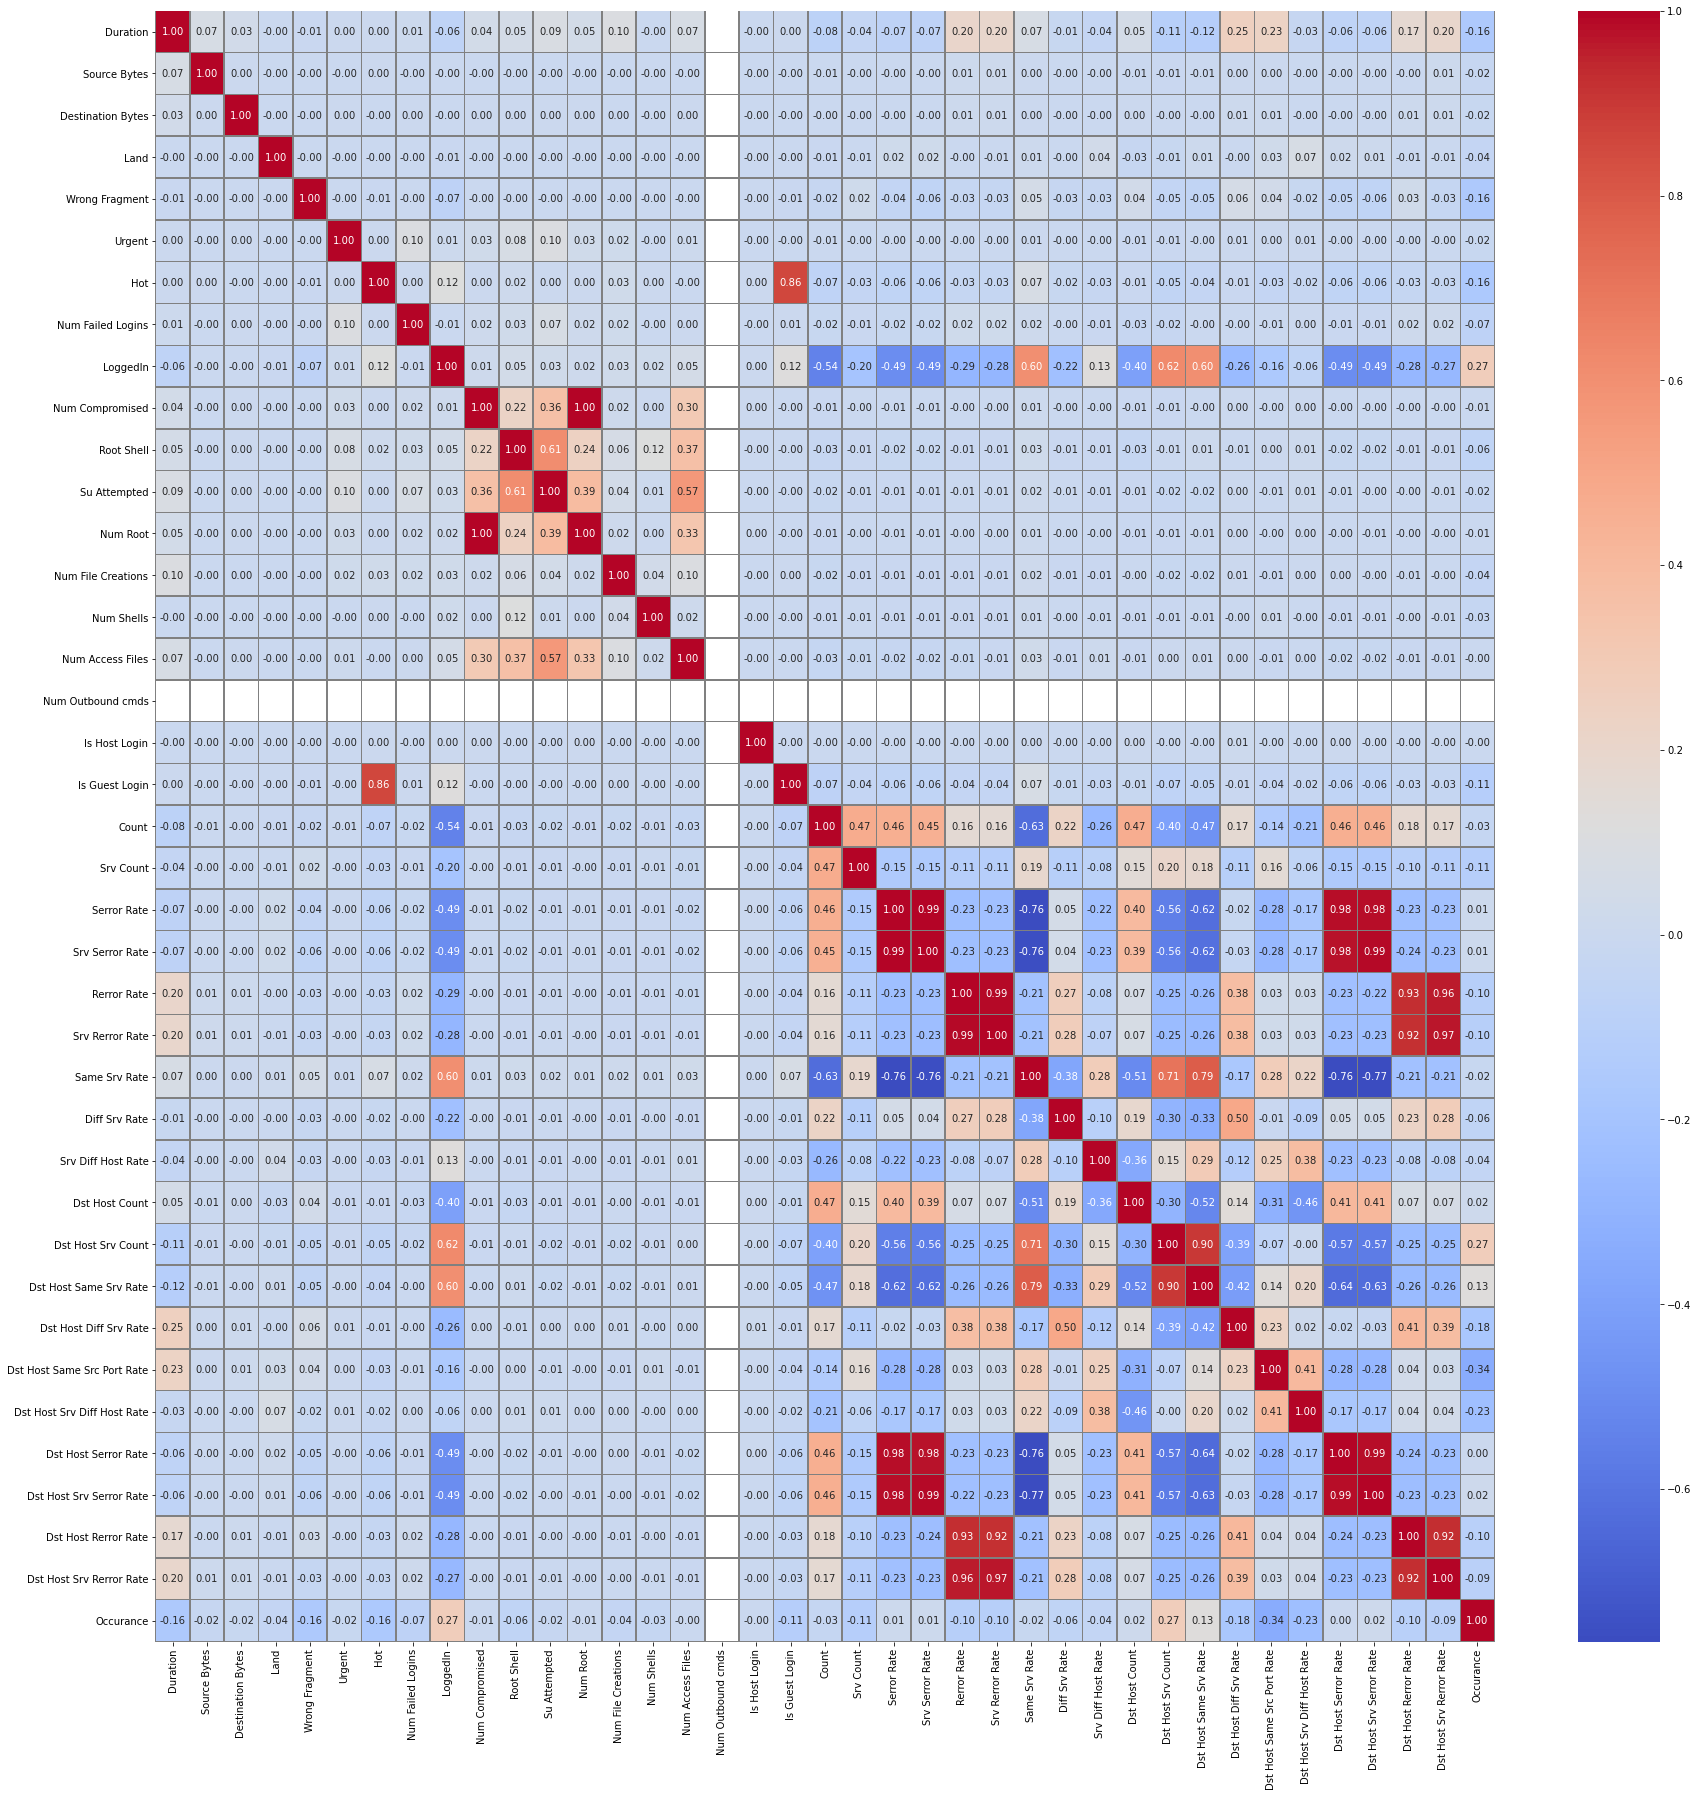

In [52]:
corr = df.corr()
plt.figure(figsize=(30,30))
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
#sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="gray", fmt='.2f')
plt.show()

In [53]:
X=newdata

In [54]:
y=df['Attack Category']

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) 
model1.fit(X_train, y_train) 

y_pred1 = model1.predict(X_test) 
print(classification_report(y_test, y_pred1)) 

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

                 precision    recall  f1-score   support

           back       0.99      0.98      0.99       276
buffer_overflow       0.60      0.55      0.57        11
      ftp_write       1.00      0.33      0.50         3
   guess_passwd       0.94      0.94      0.94        17
           imap       0.40      0.67      0.50         3
        ipsweep       0.95      0.94      0.94      1116
           land       1.00      1.00      1.00         5
     loadmodule       0.00      0.00      0.00         1
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00     12422
           nmap       0.84      0.93      0.88       461
         normal       0.99      0.99      0.99     20083
           perl       0.50      1.00      0.67         1
            phf       1.00      1.00      1.00         1
            pod       0.98      0.95      0.97        66
      portsweep       0.97      0.97      0.97       873
        rootkit       0.00    

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
accuracy_score(y_test, y_pred1)

0.9832504233700254

# KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9964013547840813
Precision: 0.7069460238493316
Recall: 0.6807458204442479
F1 score: 0.6906713151467972


<AxesSubplot:>

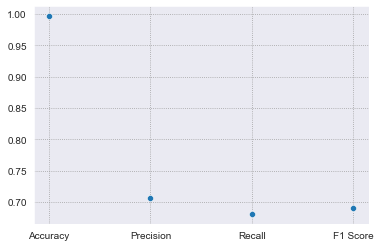

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


# DecisionTree

In [68]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9954487722269263
Precision: 0.7008011742548813
Recall: 0.7137119142989055
F1 score: 0.695258750975052


<AxesSubplot:>

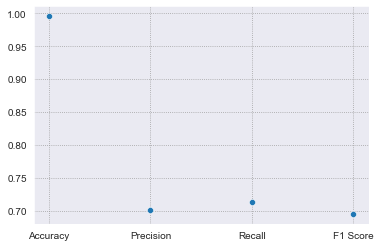

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


# ANN

In [70]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,30), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9968776460626587
Precision: 0.7584020807972768
Recall: 0.7327799599088707
F1 score: 0.7434275176975005


<AxesSubplot:>

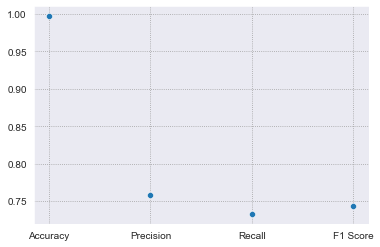

In [71]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


# k -means

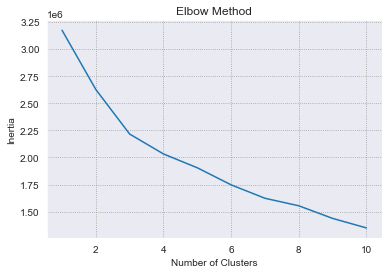

In [73]:
# Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=1)
    kmeans.fit(X_train)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [76]:


model2 = KNeighborsClassifier() 
model2.fit(X_train, y_train) 

y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2)) 


C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       1.00      0.99      0.99       276
buffer_overflow       0.62      0.45      0.53        11
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.94      0.94      0.94        17
           imap       1.00      0.67      0.80         3
        ipsweep       0.97      0.98      0.98      1116
           land       0.83      1.00      0.91         5
     loadmodule       0.00      0.00      0.00         1
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00     12422
           nmap       0.95      0.97      0.96       461
         normal       1.00      1.00      1.00     20083
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.95      0.98        66
      portsweep       0.99      0.99      0.99       873
        rootkit       0.00    

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
accuracy_score(y_test, y_pred2)

0.9964013547840813

In [78]:
 from sklearn.svm import SVC

model3 = SVC(random_state=1) 
model3.fit(X_train, y_train) 

y_pred3 = model3.predict(X_test) 
print(classification_report(y_test, y_pred3))

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.99      0.99      0.99       276
buffer_overflow       0.50      0.27      0.35        11
      ftp_write       1.00      0.33      0.50         3
   guess_passwd       1.00      0.94      0.97        17
           imap       1.00      0.67      0.80         3
        ipsweep       0.96      0.98      0.97      1116
           land       1.00      0.80      0.89         5
     loadmodule       0.00      0.00      0.00         1
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00     12422
           nmap       0.90      0.95      0.92       461
         normal       1.00      0.99      1.00     20083
           perl       1.00      1.00      1.00         1
            phf       1.00      1.00      1.00         1
            pod       0.95      0.95      0.95        66
      portsweep       0.99      0.99      0.99       873
        rootkit       0.00    

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
accuracy_score(y_test, y_pred3)

0.993861134631668

In [80]:


model5 = DecisionTreeClassifier(random_state=1) 
model5.fit(X_train, y_train) 

y_pred5 = model5.predict(X_test) 
print(classification_report(y_test, y_pred5)) 

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       1.00      0.99      0.99       276
buffer_overflow       0.78      0.64      0.70        11
      ftp_write       0.25      0.33      0.29         3
   guess_passwd       0.88      0.82      0.85        17
           imap       0.33      0.67      0.44         3
        ipsweep       0.97      0.98      0.98      1116
           land       0.38      0.60      0.46         5
     loadmodule       0.00      0.00      0.00         1
       multihop       0.00      0.00      0.00         1
        neptune       1.00      1.00      1.00     12422
           nmap       0.96      0.97      0.96       461
         normal       1.00      1.00      1.00     20083
           perl       0.50      1.00      0.67         1
            phf       0.50      1.00      0.67         1
            pod       0.98      0.86      0.92        66
      portsweep       0.99      0.99      0.99       873
        rootkit       0.50    

C:\Users\Talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
accuracy_score(y_test, y_pred5)

0.9953693903471634

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[  273     0     0     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     3     0]
 [    0     0     0     0     0     0     0     0     1     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    16     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     2     0     0     0     0     0     0     0
      0     0     0     0     0     1     0     0     0     0     0]
 [    0     0     0     0     0  1098     0     0     0     0    15     3
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     5     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]

0.9964013547840813